In [1]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

pd.set_option('max_rows',100)
pd.set_option('max_columns',100)

In [3]:
# Reading all the excel sheets one by one in the given data set
# 1. Orders

orders = pd.read_excel("Retail_dataset.xlsx", sheet_name="orders")
orders.shape

(99441, 7)

In [4]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


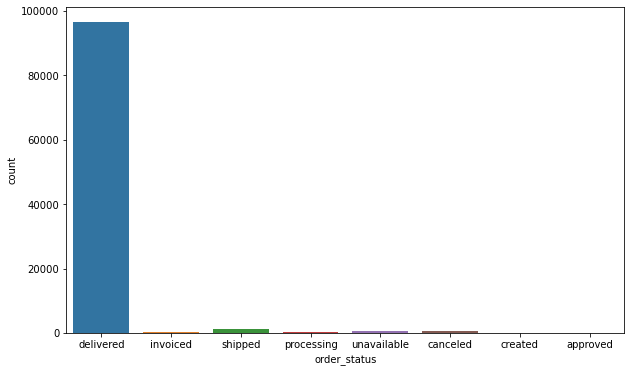

In [5]:
# Checking the different 'order_status' and their counts

plt.figure(figsize=(10,6))
sns.countplot(data=orders, x=orders['order_status'])
plt.show()

In [6]:
# We are only interested in 'delivered' order status
# Checking different order statuses

orders.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [7]:
# Checking the  total number of delivered orders

(orders.order_status=="delivered").sum()

96478

In [8]:
#Restricting the orders dataframe with order_status as 'delivered'. Therefore only delivered orders selected.

orders= orders[orders.order_status=="delivered"]
orders.shape

(96478, 7)

In [9]:
#Checking the the order_status values again

orders.order_status.unique()

array(['delivered'], dtype=object)

In [10]:
# Checking if order_id is duplicate

orders.duplicated().sum()

0

In [11]:
#Checking missing values.

orders.isnull().sum().sort_values(ascending = False)

order_approved_at                14
order_delivered_timestamp         8
order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_estimated_delivery_date     0
dtype: int64

In [12]:
#Imputing values of order_approved_at with order_purchase_timestamp

orders.order_approved_at.fillna(orders.order_purchase_timestamp, inplace=True)

# Imputing values of order_delivered_timestamp with order_estimated_delivery_date

orders.order_delivered_timestamp.fillna(orders.order_estimated_delivery_date, inplace=True)

In [13]:
# Checking again if any missing values are left

orders.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
dtype: int64

In [14]:
# 2. Order Items

# Reading the order items sheet
order_items= pd.read_excel("Retail_dataset.xlsx",sheet_name="order_items")
order_items.shape

(112650, 6)

In [15]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


In [16]:
# Checking  missing values
order_items.isnull().sum().sort_values(ascending=False)

order_id            0
order_item_id       0
product_id          0
seller_id           0
price               0
shipping_charges    0
dtype: int64

In [17]:
# 3. Customers
# # Reading the Order_items sheet
customers= pd.read_excel("Retail_dataset.xlsx", sheet_name="customers")
customers.shape


(99441, 4)

In [18]:
customers.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [19]:
# Checking for missing values

customers.isnull().sum()

customer_id                 0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [20]:
# Checking for duplicated customer values

customers.customer_id.duplicated().sum()

3345

In [21]:
#Dropping the duplicates and keeping the first occurence 

customers.drop_duplicates(subset="customer_id", keep="first", inplace=True)

In [22]:
#Checking the shape after dropping duplicates. It is less now 99441 - 3345 = 96096

customers.shape

(96096, 4)

In [23]:
# Rechecking if any duplicates are left
customers.customer_id.duplicated().sum()

0

In [24]:
# 4. Payments
# Reading the payments sheet

payments= pd.read_excel("Retail_dataset.xlsx", sheet_name="payments")
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [25]:
payments.shape

(103886, 5)

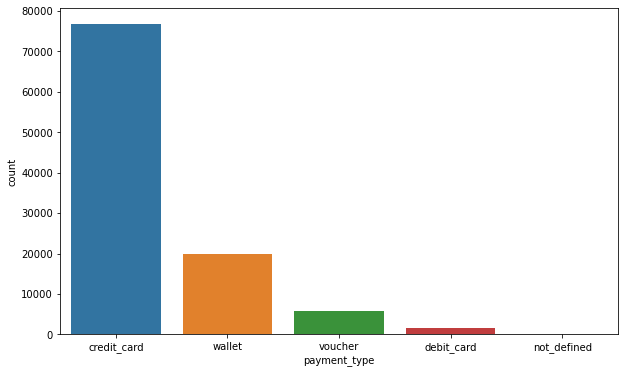

In [26]:
# Cehcking the most used payment counts and their types
plt.figure(figsize=(10,6))
sns.countplot(data=payments, x= payments['payment_type'])
plt.show()

- We can see that credit card is the most used payment type for purchase

In [27]:
# Checking the payments 'not_defined ' affected rows

payments[payments['payment_type']=='not_defined']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0


In [28]:
# Only three records are affected , so we can drop these
i=payments[payments['payment_type']=='not_defined'].index
payments.drop(i, axis=0, inplace=True)

In [29]:
# Checking if payment_type 'not defined ' is dropped

payments.payment_type.unique()

array(['credit_card', 'wallet', 'voucher', 'debit_card'], dtype=object)

In [30]:
# Checking missing values

payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [31]:
# 5. Products
# reading the products sheet

products = pd.read_excel("Retail_dataset.xlsx", sheet_name="products")
products.shape

(32951, 6)

In [32]:
products.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,625.0,20.0,17.0,13.0


In [33]:
# Checking for missing values
products.isna().sum().sort_values(ascending=False)

product_category_name    170
product_weight_g           2
product_length_cm          2
product_height_cm          2
product_width_cm           2
product_id                 0
dtype: int64

In [34]:
#Checking the mode of "product_category_name" for imputing the categorical variable - 'product_category_name'

products["product_category_name"].mode()[0]

'toys'

In [35]:
# Imputing product category name null values

products["product_category_name"].fillna(products["product_category_name"].mode()[0], inplace=True)

In [36]:
# Check for missing values
products.isna().sum().sort_values(ascending=False)

product_weight_g         2
product_length_cm        2
product_height_cm        2
product_width_cm         2
product_id               0
product_category_name    0
dtype: int64

In [37]:
#Checking the description of Numerical columns to gain insights on the NULL values of remaining columns
products.describe()

,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32949.000000,32949.000000,32949.000000,32949.000000
mean,2276.472488,30.815078,16.937661,23.196728
std,4282.038731,16.914458,13.637554,12.079047
min,0.000000,7.000000,2.000000,6.000000
25%,300.000000,18.000000,8.000000,15.000000
50%,700.000000,25.000000,13.000000,20.000000
75%,1900.000000,38.000000,21.000000,30.000000
max,40425.000000,105.000000,105.000000,118.000000


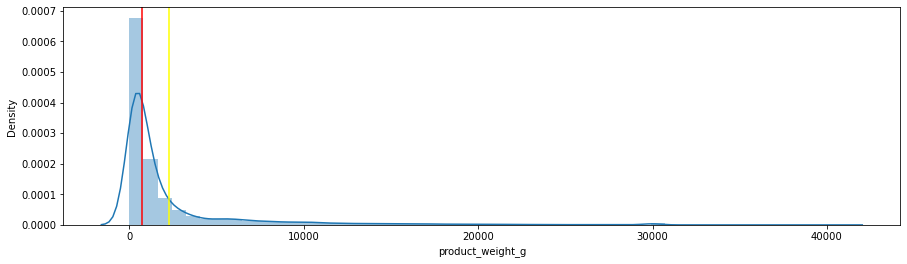

In [38]:
#Visualizing the product_weight_g for data skewness

plt.figure(figsize=(15,4))
sns.distplot(products.product_weight_g)
plt.axvline(products.product_weight_g.mean(), color="yellow")
plt.axvline(products.product_weight_g.median(), color="red")
plt.show()

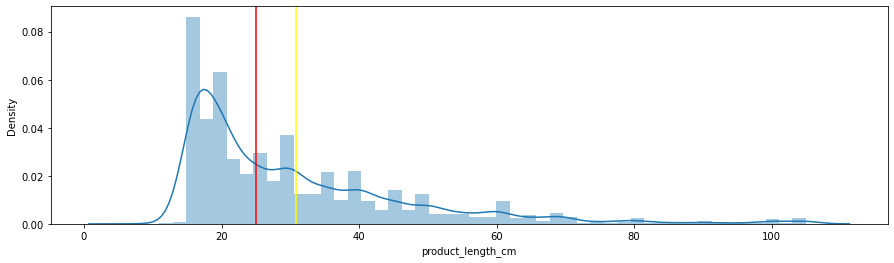

In [39]:
#Visualizing the product_length_cm for data skewness

plt.figure(figsize=(15,4))
sns.distplot(products.product_length_cm)
plt.axvline(products.product_length_cm.mean(),color="yellow")
plt.axvline(products.product_length_cm.median(), color="red")
plt.show()

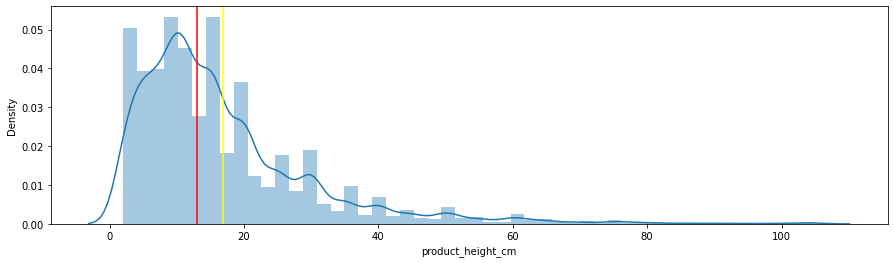

In [40]:
#Visualizing the product_height_cm for data skewness

plt.figure(figsize=(15,4))
sns.distplot(products.product_height_cm)
plt.axvline(products.product_height_cm.mean(),color="yellow")
plt.axvline(products.product_height_cm.median(), color="red")
plt.show()

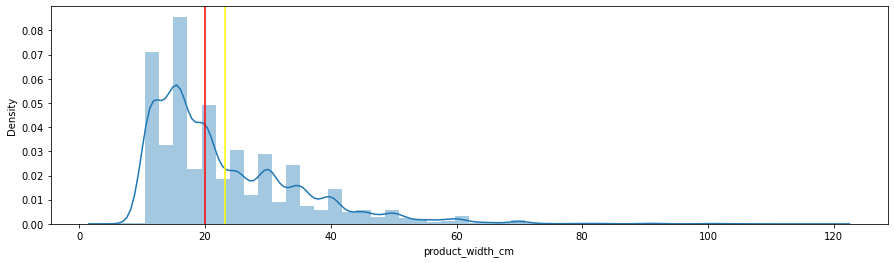

In [41]:
#Visualizing the product_width_cm for data skewness

plt.figure(figsize=(15,4))
sns.distplot(products.product_width_cm)
plt.axvline(products.product_width_cm.mean(), color="yellow")
plt.axvline(products.product_width_cm.median(), color="red")
plt.show()

In [42]:
#Imputing the missing values with appropriate method. Since all of them having right skewed distribution, therefore Median.

products.product_weight_g.fillna(products.product_weight_g.median(), inplace=True)
products.product_length_cm.fillna(products.product_length_cm.median(), inplace=True)
products.product_height_cm.fillna(products.product_height_cm.median(), inplace=True)
products.product_width_cm.fillna(products.product_width_cm.median(), inplace=True)

In [43]:
# Checking for misssing values after imputing

products.isna().sum().sort_values(ascending=True)

product_id               0
product_category_name    0
product_weight_g         0
product_length_cm        0
product_height_cm        0
product_width_cm         0
dtype: int64

### We will now merge the data set for treating outliers and then for maket basket analysis
### The sheets will be merged to according the ERD given in the xlsx file.

In [44]:
#Creating a new dataframe 'orders_delivered'. 
#This dataframe will contain the data merged using different dataframes.

#Merging 'orders' with 'order_items'

orders_delivered= pd.merge(orders,order_items, how='inner', on='order_id')

In [45]:
orders_delivered.shape

(110197, 12)

In [46]:
# Merging orders_delivered with 'products'

orders_delivered = pd.merge(orders_delivered,products,how='inner',on='product_id')

In [47]:
orders_delivered.shape

(110197, 17)

In [48]:
#Merging 'orders_delivered' with 'payments'

orders_delivered = pd.merge(orders_delivered,payments,how='inner',on='order_id')

In [49]:
orders_delivered.shape

(115035, 21)

In [50]:
#Merging 'orders_delivered' with 'customers'

orders_delivered = pd.merge(orders_delivered,customers,how='inner',on='customer_id')

In [51]:
orders_delivered.shape

(115035, 24)

In [52]:
# Final Orders_delivered Data frame
orders_delivered.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,order_item_id,product_id,seller_id,...,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,19.0,8.0,13.0,1,credit_card,1,18.12,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,19.0,8.0,13.0,3,voucher,1,2.00,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,19.0,8.0,13.0,2,voucher,1,18.59,3149,sao paulo,SP
3,69923a4e07ce446644394df37a710286,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-05 19:20:20,2017-09-15,1,9abb00920aae319ef9eba674b7d2e6ff,1771297ac436903d1dd6b0e9279aa505,...,19.0,14.0,12.0,1,credit_card,1,44.11,3149,sao paulo,SP
4,128e10d95713541c87cd1a2e48201934,3a51803cc0d012c3b5dc8b7528cb05f7,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-18 14:44:43,2017-08-28,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,19.0,8.0,13.0,1,credit_card,3,37.77,3366,sao paulo,SP


In [53]:
# Checking for null values
orders_delivered.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
price                            0
shipping_charges                 0
product_category_name            0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
dtype: int64

### Now exporting the final cleaned file of Retail Dataset

In [55]:
# orders_delivered.to_excel('Retail_dataset_cleaned.xlsx', index = False)

### Calculating average time required for a product of a particular product category to be sold

In [81]:
# Getting the latest purchase time 
orders_delivered['order_purchase_timestamp'].max()

Timestamp('2018-08-29 15:00:37')

In [82]:
# Taking the latest purchase date as reference to calculate the recency of each order
orders_delivered['days_of_purchase'] = (orders_delivered['order_purchase_timestamp'].max() - orders_delivered['order_purchase_timestamp']).dt.days
orders_delivered.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,order_item_id,product_id,seller_id,price,shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,customer_zip_code_prefix,customer_city,customer_state,days_of_purchase
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,housewares,500.0,19.0,8.0,13.0,1,credit_card,1,18.12,3149,sao paulo,SP,331
1,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,housewares,500.0,19.0,8.0,13.0,3,voucher,1,2.00,3149,sao paulo,SP,331
2,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,housewares,500.0,19.0,8.0,13.0,2,voucher,1,18.59,3149,sao paulo,SP,331
3,69923a4e07ce446644394df37a710286,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-05 19:20:20,2017-09-15,1,9abb00920aae319ef9eba674b7d2e6ff,1771297ac436903d1dd6b0e9279aa505,35.39,8.72,baby,350.0,19.0,14.0,12.0,1,credit_card,1,44.11,3149,sao paulo,SP,359
4,128e10d95713541c87cd1a2e48201934,3a51803cc0d012c3b5dc8b7528cb05f7,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-18 14:44:43,2017-08-28,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,housewares,500.0,19.0,8.0,13.0,1,credit_card,3,37.77,3366,sao paulo,SP,378


In [83]:
# Creating a dataframe to display the average recency of each product category
pc_recency = pd.DataFrame(orders_delivered.groupby('product_category_name')['days_of_purchase'].mean().reset_index())
pc_recency.shape

(70, 2)

In [84]:
# Arranging the dataframe in descending order of days of purchase
pc_recency.sort_values(by='days_of_purchase' ,ascending= False, inplace = True)

In [85]:
# Creating a dataframe to display number of orders per product category
count = pd.DataFrame(orders_delivered.groupby('product_category_name')['price'].count().reset_index())
count.columns = ['product_category_name','count']
count.head()

,product_category_name,count
0,agro_industry_and_commerce,78
1,air_conditioning,97
2,art,16
3,arts_and_craftmanship,5
4,audio,131


In [86]:
# Creating a dataframe to display total revenue per product category
revenue = pd.DataFrame(orders_delivered.groupby('product_category_name')['price'].sum().reset_index())
revenue.columns = ['product_category_name','total_revenue']
revenue.head()

,product_category_name,total_revenue
0,agro_industry_and_commerce,16050.10
1,air_conditioning,17504.93
2,art,1571.88
3,arts_and_craftmanship,379.80
4,audio,4668.48


In [87]:
# Merging the pc_recency with count 
pc_info = pd.merge(pc_recency,count, how = 'inner', on = 'product_category_name')
pc_info.head()

,product_category_name,days_of_purchase,count
0,diapers_and_hygiene,689.000000,1
1,home_comfort_2,580.000000,1
2,fashion_sport,431.000000,4
3,fashio_female_clothing,425.400000,5
4,market_place,378.163793,116


In [88]:
# Merging all the three dataframe to create a final dataframe pc_info
pc_info = pd.merge(pc_info,revenue, how = 'inner', on = 'product_category_name')
pc_info.head()

,product_category_name,days_of_purchase,count,total_revenue
0,diapers_and_hygiene,689.000000,1,134.90
1,home_comfort_2,580.000000,1,59.90
2,fashion_sport,431.000000,4,526.65
3,fashio_female_clothing,425.400000,5,271.19
4,market_place,378.163793,116,8499.97


In [89]:
# Displaying product categories with less than $1000 of total revenue
pc_info[pc_info['total_revenue']<1000]

,product_category_name,days_of_purchase,count,total_revenue
0,diapers_and_hygiene,689.000000,1,134.90
1,home_comfort_2,580.000000,1,59.90
2,fashion_sport,431.000000,4,526.65
3,fashio_female_clothing,425.400000,5,271.19
7,la_cuisine,362.400000,5,687.98
9,security_and_services,345.000000,1,100.00
17,dvds_blu_ray,269.928571,14,911.35
43,furniture_mattress_and_upholstery,223.000000,1,249.00
47,flowers,209.272727,11,307.15
49,fashion_childrens_clothes,209.000000,2,179.98


- Except "cine_photo" and "arts_and_craftmanship", all the above mentioned product categories spend more than 209 days in the inventory and incur inventory costs along with generating revenues of less than 1000 dollars."cine_photo" and "arts_and_craftmanship" can be given a chance to grow as they are frequently brought by customers and can contribute to higher revenues in future.

## Market Basket Analysis

In [91]:
# Creating BAG of items
mba = orders_delivered.groupby(by=['order_id','product_category_name'])['order_item_id'].count().unstack().reset_index().set_index('order_id').fillna(0)
mba

product_category_name,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,books_technical,christmas_supplies,cine_photo,computers,computers_accessories,consoles_games,construction_tools_construction,construction_tools_lights,construction_tools_safety,cool_stuff,costruction_tools_garden,costruction_tools_tools,diapers_and_hygiene,drinks,dvds_blu_ray,electronics,fashio_female_clothing,fashion_bags_accessories,fashion_childrens_clothes,fashion_male_clothing,fashion_shoes,fashion_sport,fashion_underwear_beach,fixed_telephony,flowers,food,food_drink,furniture_bedroom,furniture_decor,furniture_living_room,furniture_mattress_and_upholstery,garden_tools,health_beauty,home_appliances,home_appliances_2,home_comfort_2,home_confort,home_construction,housewares,industry_commerce_and_business,kitchen_dining_laundry_garden_furniture,la_cuisine,luggage_accessories,market_place,music,musical_instruments,office_furniture,party_supplies,perfumery,pet_shop,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
order_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
00018f77f2f0320c557190d7a144bdd3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
000229ec398224ef6ca0657da4fc703e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
00024acbcdf0a6daa1e931b038114c75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
00042b26cf59d7ce69dfabb4e55b4fd9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fffcd46ef2263f404302a634eb57f7eb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
fffce4705a9662cd70adb13d4a31832d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [92]:
#Creating market basket data
def convert(x):
    if x<=0:
        return 0
    if x>=1:
        return 1
mba = mba.applymap(convert)
mba

product_category_name,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,books_technical,christmas_supplies,cine_photo,computers,computers_accessories,consoles_games,construction_tools_construction,construction_tools_lights,construction_tools_safety,cool_stuff,costruction_tools_garden,costruction_tools_tools,diapers_and_hygiene,drinks,dvds_blu_ray,electronics,fashio_female_clothing,fashion_bags_accessories,fashion_childrens_clothes,fashion_male_clothing,fashion_shoes,fashion_sport,fashion_underwear_beach,fixed_telephony,flowers,food,food_drink,furniture_bedroom,furniture_decor,furniture_living_room,furniture_mattress_and_upholstery,garden_tools,health_beauty,home_appliances,home_appliances_2,home_comfort_2,home_confort,home_construction,housewares,industry_commerce_and_business,kitchen_dining_laundry_garden_furniture,la_cuisine,luggage_accessories,market_place,music,musical_instruments,office_furniture,party_supplies,perfumery,pet_shop,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
order_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
00018f77f2f0320c557190d7a144bdd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
000229ec398224ef6ca0657da4fc703e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
00024acbcdf0a6daa1e931b038114c75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
00042b26cf59d7ce69dfabb4e55b4fd9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
fffcd46ef2263f404302a634eb57f7eb,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
fffce4705a9662cd70adb13d4a31832d,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [108]:
# Visualizing the product categories ordered for more than 5 times
count_special = pd.DataFrame(mba.sum().reset_index())
count_special.columns = ['product_category_name','number of orders']

count_special[count_special['number of orders']>5].sort_values(by = 'number of orders', ascending = False)

,product_category_name,number of orders
68,toys,73267
42,health_beauty,2791
7,bed_bath_table,2315
64,sports_leisure,2036
14,computers_accessories,1887
38,furniture_decor,1721
69,watches_gifts,1465
48,housewares,1440
67,telephony,1073
5,auto,989


In [109]:
# Visualizing the product categories ordered for less than equal to 5 times
count_special[count_special['number of orders']<=5].sort_values(by = 'number of orders', ascending = False)

,product_category_name,number of orders
3,arts_and_craftmanship,5
26,fashio_female_clothing,5
31,fashion_sport,4
51,la_cuisine,4
28,fashion_childrens_clothes,2
22,diapers_and_hygiene,1
40,furniture_mattress_and_upholstery,1
45,home_comfort_2,1
60,security_and_services,1


In [73]:
# Getting the orders with 2 or more product categories in the basket
mba = mba[(mba>0).sum(axis=1)>=2]
mba

product_category_name,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,books_technical,christmas_supplies,cine_photo,computers,computers_accessories,consoles_games,construction_tools_construction,construction_tools_lights,construction_tools_safety,cool_stuff,costruction_tools_garden,costruction_tools_tools,diapers_and_hygiene,drinks,dvds_blu_ray,electronics,fashio_female_clothing,fashion_bags_accessories,fashion_childrens_clothes,fashion_male_clothing,fashion_shoes,fashion_sport,fashion_underwear_beach,fixed_telephony,flowers,food,food_drink,furniture_bedroom,furniture_decor,furniture_living_room,furniture_mattress_and_upholstery,garden_tools,health_beauty,home_appliances,home_appliances_2,home_comfort_2,home_confort,home_construction,housewares,industry_commerce_and_business,kitchen_dining_laundry_garden_furniture,la_cuisine,luggage_accessories,market_place,music,musical_instruments,office_furniture,party_supplies,perfumery,pet_shop,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
order_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00337fe25a3780b3424d9ad7c5a4b35e,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
00946f674d880be1f188abc10ad7cf46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
00bcee890eba57a9767c7b5ca12d3a1b,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
01144cadcf64b6427f0a6580a3033220,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
013a98b3a668bcef05b98898177f6923,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff632bc583a94f23c59db4cbaa0ba2ab,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
ffa466d3e55f98477b7e0da764df3c6c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
ffb9a9cd00c74c11c24aa30b3d78e03b,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [67]:
# importing libraries related to market basket analysis
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

#### Creating Frequent itemset

In [68]:
#Apply apriori algorithm to data with min. support threshold of 0.01
frequent_itemset = apriori(mba, min_support = 0.01, use_colnames= True)
frequent_itemset

C:\Users\Dell\Anaconda3\envs\new1\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:115: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


,support,itemsets
0,0.031128,(auto)
1,0.018677,(baby)
2,0.230350,(bed_bath_table)
3,0.084047,(computers_accessories)
4,0.010117,(construction_tools_construction)
5,0.021790,(cool_stuff)
6,0.032685,(fashion_bags_accessories)
7,0.126848,(furniture_decor)
8,0.042023,(garden_tools)
9,0.066148,(health_beauty)


In [69]:
# Getting association rules using support and a minimum threshold of 0.01.
support_association = association_rules(frequent_itemset, metric = 'support', min_threshold =0.01)
support_association

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(toys),(auto),0.971206,0.031128,0.030350,0.031250,1.003906,0.000118,1.000126
1,(auto),(toys),0.031128,0.971206,0.030350,0.975000,1.003906,0.000118,1.151751
2,(toys),(baby),0.971206,0.018677,0.015564,0.016026,0.858040,-0.002575,0.997305
3,(baby),(toys),0.018677,0.971206,0.015564,0.833333,0.858040,-0.002575,0.172763
4,(toys),(bed_bath_table),0.971206,0.230350,0.226459,0.233173,1.012255,0.002742,1.003681
5,(bed_bath_table),(toys),0.230350,0.971206,0.226459,0.983108,1.012255,0.002742,1.704591
6,(toys),(computers_accessories),0.971206,0.084047,0.080156,0.082532,0.981979,-0.001471,0.998349
7,(computers_accessories),(toys),0.084047,0.971206,0.080156,0.953704,0.981979,-0.001471,0.621946
8,(toys),(cool_stuff),0.971206,0.021790,0.019455,0.020032,0.919328,-0.001707,0.998206
9,(cool_stuff),(toys),0.021790,0.971206,0.019455,0.892857,0.919328,-0.001707,0.268742


In [70]:
# Getting association rules using confidence and a minimum threshold of 0.01.
confidence_association = association_rules(frequent_itemset, metric = 'confidence', min_threshold = 0.01)
confidence_association

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(toys),(auto),0.971206,0.031128,0.030350,0.031250,1.003906,0.000118,1.000126
1,(auto),(toys),0.031128,0.971206,0.030350,0.975000,1.003906,0.000118,1.151751
2,(toys),(baby),0.971206,0.018677,0.015564,0.016026,0.858040,-0.002575,0.997305
3,(baby),(toys),0.018677,0.971206,0.015564,0.833333,0.858040,-0.002575,0.172763
4,(toys),(bed_bath_table),0.971206,0.230350,0.226459,0.233173,1.012255,0.002742,1.003681
5,(bed_bath_table),(toys),0.230350,0.971206,0.226459,0.983108,1.012255,0.002742,1.704591
6,(toys),(computers_accessories),0.971206,0.084047,0.080156,0.082532,0.981979,-0.001471,0.998349
7,(computers_accessories),(toys),0.084047,0.971206,0.080156,0.953704,0.981979,-0.001471,0.621946
8,(toys),(cool_stuff),0.971206,0.021790,0.019455,0.020032,0.919328,-0.001707,0.998206
9,(cool_stuff),(toys),0.021790,0.971206,0.019455,0.892857,0.919328,-0.001707,0.268742


- We are getting the same results in both types of associations. Hence we can choose any of the metrics.

In [71]:
# Select rules with a lift above 1 and consequent support above 0.9.
final_choice = confidence_association[(confidence_association['lift'] > 1) & (confidence_association['consequent support']> 0.9)]
final_choice

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(auto),(toys),0.031128,0.971206,0.030350,0.975000,1.003906,0.000118,1.151751
5,(bed_bath_table),(toys),0.230350,0.971206,0.226459,0.983108,1.012255,0.002742,1.704591
10,(fashion_bags_accessories),(toys),0.032685,0.971206,0.031907,0.976190,1.005132,0.000163,1.209339
29,(stationery),(toys),0.023346,0.971206,0.023346,1.000000,1.029647,0.000672,inf
31,(telephony),(toys),0.023346,0.971206,0.023346,1.000000,1.029647,0.000672,inf
33,(watches_gifts),(toys),0.058366,0.971206,0.056809,0.973333,1.002190,0.000124,1.079767


## Recommendations

**`Market Basket Analysis:`**
- About 97% times people who bought auto or fashion_bag_accessories or watches_gifts also bought toys.
- 98% times people who bought bed_bath_table also bought toys.
- People who bought stationary or telephony always bought toys.This is an interesting insight.

**`Inventory management:`**
- They should eliminate below mentioned categories from their product category range as they are occupying inventory storage for more than 209 days and provides revenue returns less than 1000 dollars.
- diapers_and_hygiene
- home_comfort_2
- fashion_sport
- fashio_female_clothing
- la_cuisine
- security_and_services
- dvds_blu_ray
- furniture_mattress_and_upholstery
- flowers
- fashion_childrens_clothes
- "cine_photo" and "arts_and_craftmanship" can be given a chance to grow as they are frequently bought by customers and can contribute to higher revenues in future.